# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('mental-health-directory-2024.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 13
  name1   name2 street1 street2 city  state zip   phone intake1 intake2 intake1a
  <chr>   <chr> <chr>   <chr>   <chr> <chr> <chr> <chr> <chr>   <chr>   <chr>   
1 Spectr… Henr… 219 Do… <NA>    Abbe… AL    36310 800-… <NA>    <NA>    <NA>    
2 Spectr… Henr… 1242 U… <NA>    Abbe… AL    36310 800-… 334-95… <NA>    <NA>    
3 South … Covi… 19815 … <NA>    Anda… AL    36420 334-… 877-53… <NA>    <NA>    
4 South … Mont… 205 Ac… <NA>    Anda… AL    36420 334-… 877-53… <NA>    <NA>    
# ℹ 2 more variables: intake2a <lgl>, service_code_info <chr>


In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [13]:
%%R
df_summary <- df %>%
  group_by(state, zip) %>%
  summarize(
    count = n(),
    .groups = "drop"  
  )

print(df_summary)


# A tibble: 5,161 × 3
   state zip   count
   <chr> <chr> <int>
 1 AK    99503     2
 2 AK    99504     1
 3 AK    99507     1
 4 AK    99508     6
 5 AK    99518     3
 6 AK    99519     1
 7 AK    99573     1
 8 AK    99574     1
 9 AK    99577     1
10 AK    99603     1
# ℹ 5,151 more rows
# ℹ Use `print(n = ...)` to see more rows


In [14]:
%%R
df_summary <- df %>%
  group_by(state, city) %>%
  summarize(
    count = n(),
    .groups = "drop"  
  )

print(df_summary)

# A tibble: 3,628 × 3
   state city          count
   <chr> <chr>         <int>
 1 AK    Anchorage        14
 2 AK    Anderson          1
 3 AK    Barrow            3
 4 AK    Copper Center     1
 5 AK    Cordova           1
 6 AK    Craig             1
 7 AK    Eagle River       1
 8 AK    Fairbanks         5
 9 AK    Haines            1
10 AK    Healy             1
# ℹ 3,618 more rows
# ℹ Use `print(n = ...)` to see more rows


## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

In [ ]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

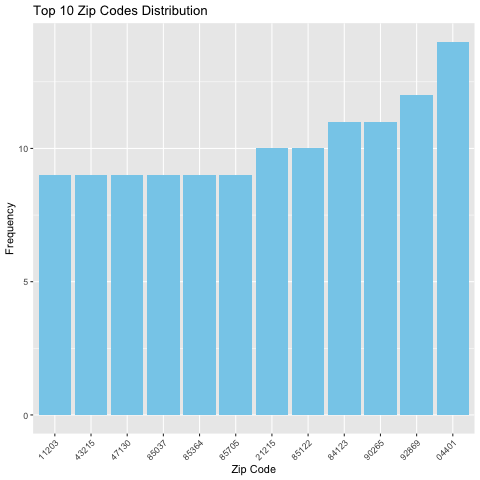

In [17]:
%%R
library(dplyr)
library(ggplot2)

top_zip <- df %>%
  count(zip) %>%
  top_n(10, n)

ggplot(top_zip, aes(x = reorder(zip, n), y = n)) +
  geom_col(fill = "skyblue") +
  labs(
    title = "Top 10 Zip Codes Distribution",
    x = "Zip Code",
    y = "Frequency"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


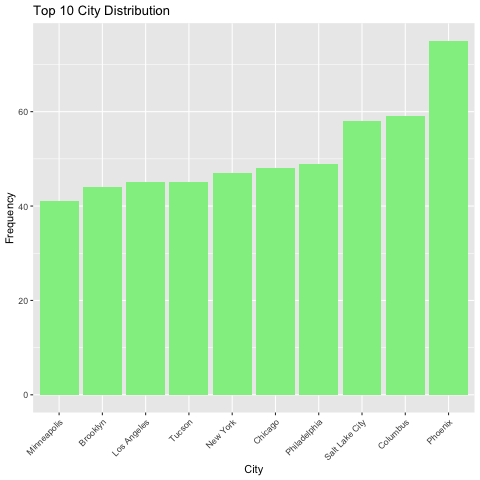

In [19]:
%%R
top_city <- df %>%
  count(city) %>%
  top_n(10, n)

ggplot(top_city, aes(x = reorder(city, n), y = n)) +
  geom_col(fill = "lightgreen") +
  labs(
    title = "Top 10 City Distribution",
    x = "City",
    y = "Frequency"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
